<a href="https://colab.research.google.com/github/jeenhyung/mnist_example/blob/main/Vanilla_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

(2400,) (2400,) (2400,)
[ 0.04845331  0.12223668  0.2650656  ... -1.56609976 -1.3277942
 -1.30529527]


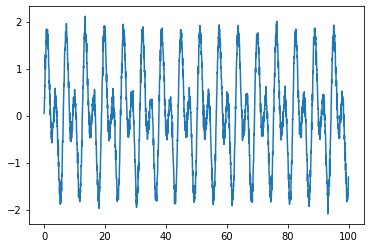

In [2]:
num_data = 2400
t = np.linspace(0.0, 100.0, num_data) # 0.0부터 100.0까지의 수를 num_data로 나눈 값들의 리스트
# print(t)
y = np.sin(t) + np.sin(2*t) # + np.sin(0.1*t)
# print(y)
e = np.random.normal(0, 0.1, num_data)
# print(e)
print (t.shape, y.shape, e.shape)
y = y + e
print(y)

plt.plot(t, y)

In [3]:
seq_len = 10
X = []
y_true = []
for i in range(len(t) - seq_len):
  X.append(y[i:i+seq_len])
  y_true.append(y[i+seq_len])

X = np.array(X)
y_true = np.array(y_true)

X = np.swapaxes(X, 0, 1)  # 0번째 차원과 1번째 차원 스왑 3x2 -> 2x3
X = np.expand_dims(X, axis=2) # 인덱스 2 위치에 차원 추가
# [seq_len, batch_size, input_dim]

print(X.shape)
print(y_true.shape)


(10, 2390, 1)
(2390,)


# Model Define

In [4]:
import torch
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size): 
        super(RNN, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size
        
        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
        self.act = nn.Tanh()
        
        self.hidden = self.init_hidden()
        
    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim) # 0으로 채워진 1 x hid_im 크기의 텐서
    
    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)
        return y, h

In [5]:
import torch.optim as optim

model = RNN(1, 1, 10, 2390)
print(model.hidden)
print(model.hidden.shape)

loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
epoch = 30

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([2390, 10])


In [6]:
print(X.shape)

for i in range(epoch):
  model.train()
  model.zero_grad()
  optimizer.zero_grad()

  model.hidden = model.init_hidden()

  for x in X:
    x = torch.Tensor(x).float()
    y_true = torch.Tensor(y_true).float()
    # print(x.shape)
    # print(y_true.shape)
    y_pred, hidden = model(x)
    model.hidden = hidden

  loss = loss_fn(y_pred.view(-1), y_true.view(-1))
  loss.backward()
  optimizer.step()
  print(loss.item())



(10, 2390, 1)
0.5792827606201172
0.5543850064277649
0.530565619468689
0.5077773928642273
0.4859757125377655
0.46511802077293396
0.44516465067863464
0.42607739567756653
0.4078201353549957
0.39035844802856445
0.3736596703529358
0.3576924204826355
0.34242692589759827
0.32783448696136475
0.3138878643512726
0.300560861825943
0.28782832622528076
0.2756659686565399
0.26405075192451477
0.2529604434967041
0.2423735409975052
0.23226946592330933
0.2226283848285675
0.213431254029274
0.2046596258878708
0.19629588723182678
0.18832291662693024
0.1807243376970291
0.17348426580429077
0.16658754646778107


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1,

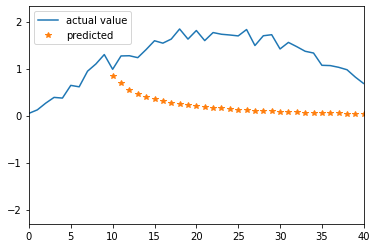

In [28]:
test_X = np.expand_dims(X[:, 0, :], 1)
print(test_X.shape) # (10, 1, 1)
list_y_pred = []

model.eval()
with torch.no_grad():
  
    model.hidden = model.init_hidden(batch_size=1)

    for x in test_X:
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden

    list_y_pred.append(y_pred.view(-1).item())
    
    temp_X = list()
    temp_X += list(np.squeeze(test_X))[1:] # (10, 1, 1)을 (10,)으로 차원을 줄이고 1번 인덱스부터 temp_X에 넣는다.
    temp_X.append(y_pred.view(-1).item()) # y_pred(1,1)를 1차원(1,)으로 줄이고 그 값을 temp_X의 끝에 추가한다.

    for i in range(2389):
        model.hidden = model.init_hidden(batch_size=1)
        
        temp2_X = torch.unsqueeze(torch.unsqueeze(torch.Tensor(temp_X), 1), 1) # (10,) to (10, 1, 1)

        for x in temp2_X:
          y_pred, hidden = model(x)  # x.shape : (1,1)
          model.hidden = hidden
          
        list_y_pred.append(y_pred.view(-1).item())
        
        temp_X.append(y_pred.view(-1).item())
        temp_X.pop(0)

plt.plot(y, label='actual value')
plt.plot(list(range(10, 2400)), list_y_pred, '*', label='predicted')
plt.xlim(0, 40)
plt.legend()

In [26]:
test_X = np.arange(10).reshape(10, 1, 1)
print(test_X.shape)
temp_X = list()
temp_X += list(np.squeeze(test_X))[1:]
temp_X += list(np.squeeze(test_X))[1:]
print(temp_X)
temp_X.append(y_pred.view(-1).item())
print(temp_X)

(10, 1, 1)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1.401298464324817e-45]
